<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


##### Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,7407-SUJIZ,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Clean the data 

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
# We drop 'customer ID' all are uniques
df = df.drop(columns = ['customerID'])

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

No     5174
Yes    1869
Name: Churn, dtype: int64

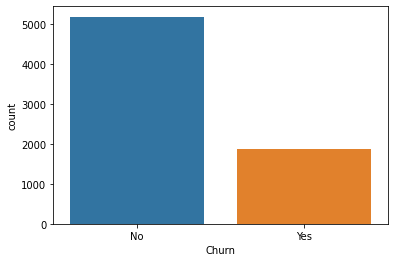

In [16]:
sns.countplot(x='Churn', data=df);
df['Churn'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

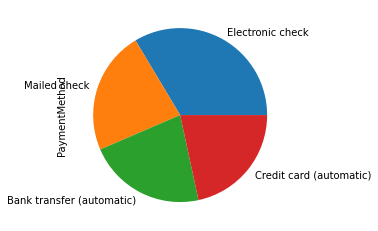

In [17]:
df['PaymentMethod'].value_counts().plot.pie()
plt.gca().set_aspect('equal')
df['PaymentMethod'].value_counts()

In [19]:
# converting the non-numeric data into numeric data.
from sklearn.preprocessing import LabelEncoder
encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [20]:
# Create Features DataFrame
X = encoded.drop('Churn',axis=1)

# Create Target Series
y = encoded['Churn']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Scale Data
sc= StandardScaler()

# fit_transform on train
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X.columns)

# transform on test
X_test = sc.transform(X_test)

In [25]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.995467,-0.435476,-0.969419,-0.656543,-0.340191,0.32585,-0.989109,-1.183097,-0.922069,-1.028375,1.250255,-0.916261,-1.109924,-1.117908,-0.822773,0.820754,-0.538494,-0.514314,-1.509527
1,1.004554,2.296336,-0.969419,-0.656543,0.883210,0.32585,-0.989109,-1.183097,-0.922069,-1.028375,1.250255,1.411632,-1.109924,1.141866,0.382743,-1.218392,-1.472592,0.017840,-0.113827
2,1.004554,-0.435476,-0.969419,-0.656543,-1.196572,-3.06890,0.064850,-1.183097,-0.922069,-1.028375,1.250255,-0.916261,1.150145,-1.117908,-0.822773,0.820754,1.329701,-0.819594,-1.443241
3,-0.995467,-0.435476,1.031546,-0.656543,1.168670,0.32585,-0.989109,1.528017,0.239756,0.108001,0.113229,0.247686,0.020110,0.011979,1.588260,-1.218392,-0.538494,-1.483535,-1.464453
4,1.004554,-0.435476,-0.969419,-0.656543,-0.829552,0.32585,1.118809,0.172460,-0.922069,-1.028375,-1.023797,-0.916261,1.150145,-1.117908,-0.822773,0.820754,0.395603,0.658427,-1.674974


##### Create and fit a baseline Keras MLP model to the data.

In [ ]:
X.shape

In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Important Hyperparameters
inputs = X_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit Model
model.fit(X_train, y_train, 
          validation_data=(X_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size
         )

Train on 5282 samples, validate on 1761 samples
Epoch 1/75
5282/5282 [==============================] - 2s 466us/sample - loss: 0.1564 - mse: 0.1564 - mae: 0.3030 - val_loss: 0.1520 - val_mse: 0.1520 - val_mae: 0.2838
Epoch 2/75
5282/5282 [==============================] - 3s 514us/sample - loss: 0.1378 - mse: 0.1378 - mae: 0.2776 - val_loss: 0.1521 - val_mse: 0.1521 - val_mae: 0.2784
Epoch 3/75
5282/5282 [==============================] - 2s 364us/sample - loss: 0.1317 - mse: 0.1317 - mae: 0.2693 - val_loss: 0.1499 - val_mse: 0.1499 - val_mae: 0.2909
Epoch 4/75
5282/5282 [==============================] - 2s 332us/sample - loss: 0.1292 - mse: 0.1292 - mae: 0.2643 - val_loss: 0.1474 - val_mse: 0.1474 - val_mae: 0.2808
Epoch 5/75
5282/5282 [==============================] - 2s 336us/sample - loss: 0.1263 - mse: 0.1263 - mae: 0.2603 - val_loss: 0.1504 - val_mse: 0.1504 - val_mae: 0.2870
Epoch 6/75
5282/5282 [==============================] - 2s 355us/sample - loss: 0.1238 - mse: 0.1238 -

5282/5282 [==============================] - 2s 314us/sample - loss: 0.0625 - mse: 0.0625 - mae: 0.1745 - val_loss: 0.2129 - val_mse: 0.2129 - val_mae: 0.3343
Epoch 49/75
5282/5282 [==============================] - 2s 320us/sample - loss: 0.0630 - mse: 0.0630 - mae: 0.1748 - val_loss: 0.2215 - val_mse: 0.2215 - val_mae: 0.3379
Epoch 50/75
5282/5282 [==============================] - 2s 306us/sample - loss: 0.0614 - mse: 0.0614 - mae: 0.1725 - val_loss: 0.2261 - val_mse: 0.2261 - val_mae: 0.3430
Epoch 51/75
5282/5282 [==============================] - 2s 301us/sample - loss: 0.0611 - mse: 0.0611 - mae: 0.1724 - val_loss: 0.2172 - val_mse: 0.2172 - val_mae: 0.3289
Epoch 52/75
5282/5282 [==============================] - 2s 333us/sample - loss: 0.0610 - mse: 0.0610 - mae: 0.1719 - val_loss: 0.2169 - val_mse: 0.2169 - val_mae: 0.3244
Epoch 53/75
5282/5282 [==============================] - 3s 552us/sample - loss: 0.0607 - mse: 0.0607 - mae: 0.1713 - val_loss: 0.2158 - val_mse: 0.2158 - va

In [29]:
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# # load dataset
# url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# dataset = pd.read_csv(url, header=None).values

# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=19, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20, 40, 60]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7983703494071961 using {'batch_size': 10, 'epochs': 20}
Means: 0.7983703494071961, Stdev: 0.015399499499020348 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7898488759994506, Stdev: 0.015899659270812112 with: {'batch_size': 10, 'epochs': 40}
Means: 0.7964796423912048, Stdev: 0.013599946615251728 with: {'batch_size': 10, 'epochs': 60}
Means: 0.793826699256897, Stdev: 0.016155125900081047 with: {'batch_size': 20, 'epochs': 20}
Means: 0.795722234249115, Stdev: 0.010476981290081223 with: {'batch_size': 20, 'epochs': 40}
Means: 0.7915564775466919, Stdev: 0.015285959138802718 with: {'batch_size': 20, 'epochs': 60}
Means: 0.7887161016464234, Stdev: 0.009743458782465903 with: {'batch_size': 40, 'epochs': 20}
Means: 0.7938266873359681, Stdev: 0.014849917818649114 with: {'batch_size': 40, 'epochs': 40}
Means: 0.7906093239784241, Stdev: 0.016810710933881604 with: {'batch_size': 40, 'epochs': 60}
Means: 0.7930708885192871, Stdev: 0.012265553107100414 with: {'batch_size': 60, 'epochs': 20

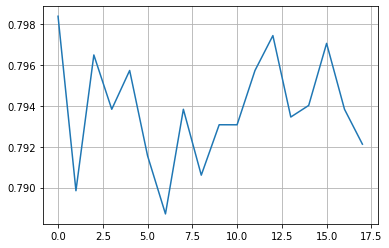

In [47]:
plt.grid(True)
plt.plot(means);

In [53]:
results = model.fit(X_train, y_train, batch_size=10, epochs=20)
results

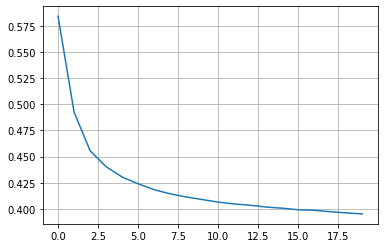

In [57]:
plt.grid(True)
plt.plot(results.history['loss']);

In [58]:
y_pred_proba = model.predict(X_test)

In [59]:
#Convert Prediction to Int
y_pred = (y_pred_proba>.5).astype('int')

In [62]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1298
           1       0.61      0.52      0.56       463

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.78      0.78      0.78      1761



Text(91.68, 0.5, 'predicted label')

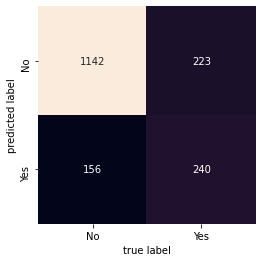

In [63]:
#Confusion Matrix
mat_ann = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_ann.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

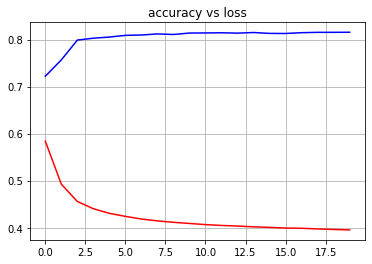

In [72]:
results.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(results.history['accuracy'])), results.history['accuracy'],c='blue')
plt.plot(range(len(results.history['loss'])), results.history['loss'],c='red')
plt.grid(True)
plt.title('accuracy vs loss')
plt.show()

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?